In [1]:
!wget "https://drive.google.com/uc?export=download&id=10g3IxY8nvE71v3NuqzpDhr2in-EOBX1W" -O titanic.csv

--2024-10-22 02:42:33--  https://drive.google.com/uc?export=download&id=10g3IxY8nvE71v3NuqzpDhr2in-EOBX1W
Resolving drive.google.com (drive.google.com)... 216.58.220.110, 2404:6800:4004:818::200e
Connecting to drive.google.com (drive.google.com)|216.58.220.110|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=10g3IxY8nvE71v3NuqzpDhr2in-EOBX1W&export=download [following]
--2024-10-22 02:42:34--  https://drive.usercontent.google.com/download?id=10g3IxY8nvE71v3NuqzpDhr2in-EOBX1W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 216.58.220.129, 2404:6800:4004:823::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|216.58.220.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116752 (114K) [application/octet-stream]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>] 114.02K  --.-KB/s    in 0.05s 

In [2]:
!ls

titanic.csv  準備編.ipynb


In [3]:
!cat titanic.csv

"pclass","survived","name","sex","age","sibsp","parch","ticket","fare","cabin","embarked","boat","body","home.dest"
1,1,"Allen, Miss. Elisabeth Walton","female",29,0,0,"24160",211.3375,"B5","S","2",,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor","male",0.92,1,2,"113781",151.5500,"C22 C26","S","11",,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine","female",2,1,2,"113781",151.5500,"C22 C26","S",,,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mr. Hudson Joshua Creighton","male",30,1,2,"113781",151.5500,"C22 C26","S",,"135","Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","female",25,1,2,"113781",151.5500,"C22 C26","S",,,"Montreal, PQ / Chesterville, ON"
1,1,"Anderson, Mr. Harry","male",48,0,0,"19952",26.5500,"E12","S","3",,"New York, NY"
1,1,"Andrews, Miss. Kornelia Theodosia","female",63,1,0,"13502",77.9583,"D7","S","10",,"Hudson, NY"
1,0,"Andrews, Mr. Thomas Jr","male",39,0,0,"112050",0.0000,"A36","S",,,"Belfast, NI"
1,1,

In [4]:
import pandas as pd
import polars as pl

In [5]:
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
df.groupby('sex')['sibsp'].mean()

sex
female    0.652361
male      0.413998
Name: sibsp, dtype: float64

In [8]:
df['age']

0       29.00
1        0.92
2        2.00
3       30.00
4       25.00
        ...  
1304    14.50
1305      NaN
1306    26.50
1307    27.00
1308    29.00
Name: age, Length: 1309, dtype: float64

In [9]:
df.fillna({'age': 29.88})

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29.88,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


<Axes: xlabel='age', ylabel='fare'>

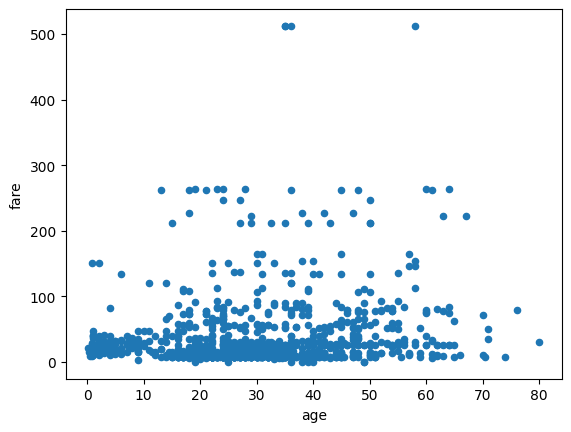

In [10]:
df.plot.scatter(x='age', y='fare')

In [11]:
import numpy as np

In [12]:
df = pl.DataFrame(
    {
        'nrs': [1, 2, 3, None, 5],
        'names': ['foo', 'ham', 'spam', 'egg', None],
        'random': np.random.rand(5),
        'groups': ['A', 'A', 'B', 'C', 'B']
    }    
)
print(df)

shape: (5, 4)
┌──────┬───────┬──────────┬────────┐
│ nrs  ┆ names ┆ random   ┆ groups │
│ ---  ┆ ---   ┆ ---      ┆ ---    │
│ i64  ┆ str   ┆ f64      ┆ str    │
╞══════╪═══════╪══════════╪════════╡
│ 1    ┆ foo   ┆ 0.294468 ┆ A      │
│ 2    ┆ ham   ┆ 0.390898 ┆ A      │
│ 3    ┆ spam  ┆ 0.2836   ┆ B      │
│ null ┆ egg   ┆ 0.540708 ┆ C      │
│ 5    ┆ null  ┆ 0.833345 ┆ B      │
└──────┴───────┴──────────┴────────┘


In [13]:
df.select(pl.col('names'))

names
str
"""foo"""
"""ham"""
"""spam"""
"""egg"""
null


In [14]:
df.select(pl.col('nrs') + pl.col('random').mean() + 10)

nrs
f64
11.468604
12.468604
13.468604
null
15.468604


In [15]:
df.select(
    pl.col('names'),
    pl.col('nrs') * 2,
    pl.col('groups')
)

names,nrs,groups
str,i64,str
"""foo""",2,"""A"""
"""ham""",4,"""A"""
"""spam""",6,"""B"""
"""egg""",null,"""C"""
null,10,"""B"""


In [16]:
df.with_columns(pl.col('nrs') + pl.col('random').mean() + 10)

nrs,names,random,groups
f64,str,f64,str
11.468604,"""foo""",0.294468,"""A"""
12.468604,"""ham""",0.390898,"""A"""
13.468604,"""spam""",0.2836,"""B"""
null,"""egg""",0.540708,"""C"""
15.468604,null,0.833345,"""B"""


In [17]:
df.with_columns(
    (pl.col('nrs') + pl.col('random').mean() + 10).alias('feature')
)

nrs,names,random,groups,feature
i64,str,f64,str,f64
1,"""foo""",0.294468,"""A""",11.468604
2,"""ham""",0.390898,"""A""",12.468604
3,"""spam""",0.2836,"""B""",13.468604
null,"""egg""",0.540708,"""C""",null
5,null,0.833345,"""B""",15.468604


In [18]:
df.with_columns(
    pl.col('nrs').alias('feature') + pl.col('random').mean() + 10
)

nrs,names,random,groups,feature
i64,str,f64,str,f64
1,"""foo""",0.294468,"""A""",11.468604
2,"""ham""",0.390898,"""A""",12.468604
3,"""spam""",0.2836,"""B""",13.468604
null,"""egg""",0.540708,"""C""",null
5,null,0.833345,"""B""",15.468604


In [19]:
df.select(pl.col('groups') == 'A')

groups
bool
true
true
false
false
false


In [20]:
df.filter(pl.col('groups') == 'A')

nrs,names,random,groups
i64,str,f64,str
1,"""foo""",0.294468,"""A"""
2,"""ham""",0.390898,"""A"""


In [21]:
df.filter((pl.col('nrs') > 1) & (pl.col('groups') == 'A'))

nrs,names,random,groups
i64,str,f64,str
2,"""ham""",0.390898,"""A"""


In [22]:
df.filter(pl.col('nrs') > 1, pl.col('groups') == 'A')

nrs,names,random,groups
i64,str,f64,str
2,"""ham""",0.390898,"""A"""
